In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles


In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'AltAz'
resultsDb = db.ResultsDb(outDir=outDir)

##Pointings per year##

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint night between 1095 and 1461
Found 250088 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_between_1095_and_1461_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint night between 0 and 365
Found 272657 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_between_0_and_365_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint night between 2922 and 3287
Found 250549 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_between_2922_and_3287_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint night between 1461 and 1826
Found 246665 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_between_1461_and_1826_HEAL

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


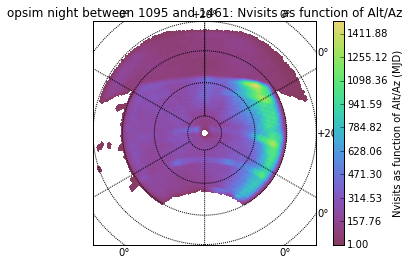

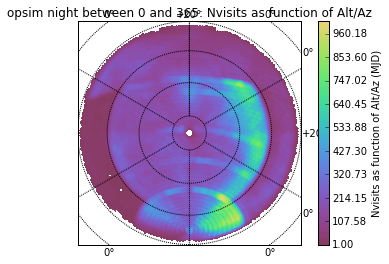

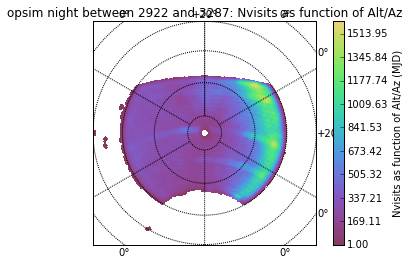

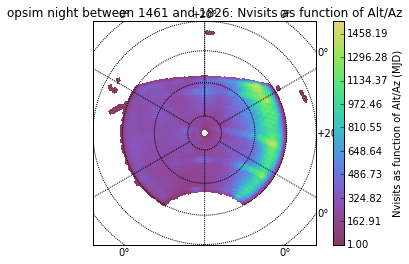

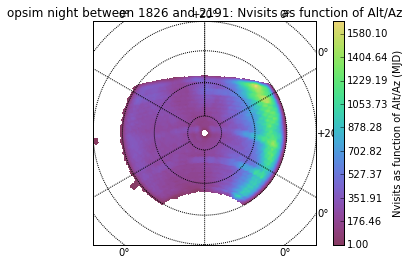

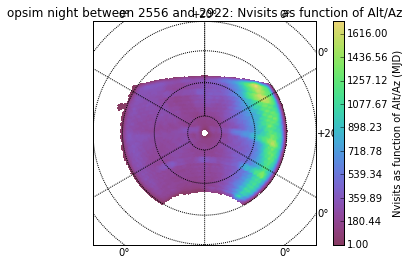

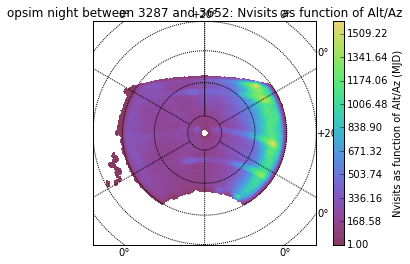

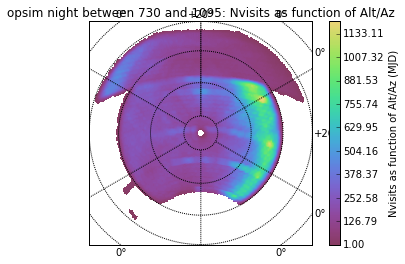

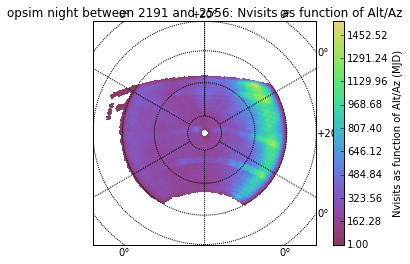

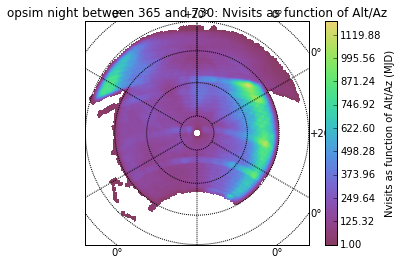

In [9]:
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
metric = metrics.CountMetric('expMJD', metricName='Nvisits as function of Alt/Az')
plotDict = {}
nightLimits = np.arange(0,11,1)*365.25
for lowerLimit,upperLimit in zip(nightLimits[:-1],nightLimits[1:]):
    bundleList = []
    plotFuncs = [plots.LambertSkyMap()]
    sql = 'night between %i and %i' % (lowerLimit,upperLimit)
    bundle = metricBundles.MetricBundle(metric, slicer,sql,
                                        plotFuncs=plotFuncs)
    bundleList.append(bundle)
    bDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

##Pointings per month ##

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint night % 365.25 between 0 and 30
Found 207982 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_%_365_25_between_0_and_30_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night % 365.25 between 0 and 30 sqlconstraint now.
Plotting complete.
Querying database with constraint night % 365.25 between 30 and 60
Found 228400 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_%_365_25_between_30_and_60_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night % 365.25 between 30 and 60 sqlconstraint now.
Plotting complete.
Querying database with constraint night % 365.25 between 60 and 91
Found 246517 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_night_%_365_25_between_60_and_91_HEAL']
Completed metric generation.
Runn

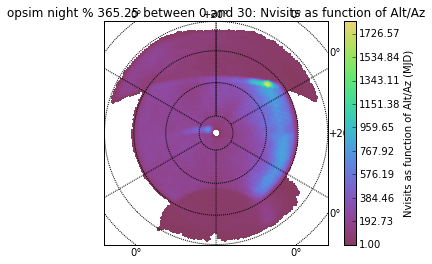

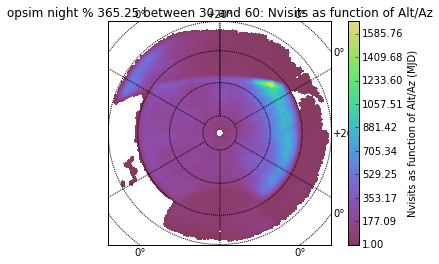

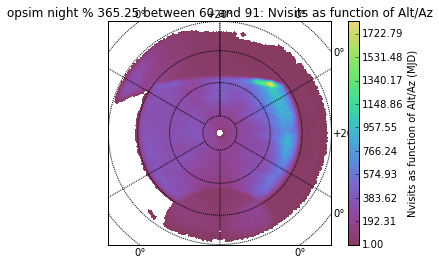

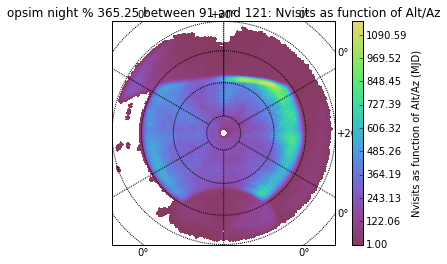

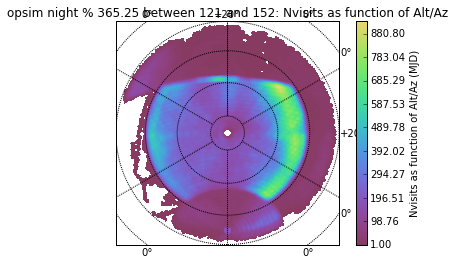

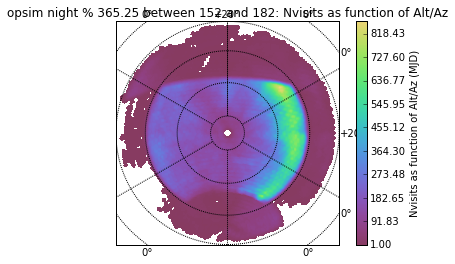

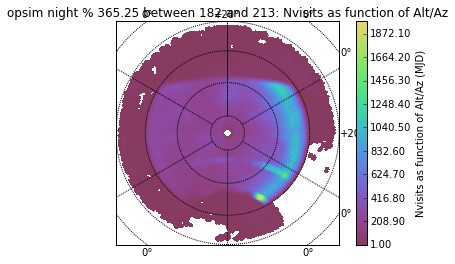

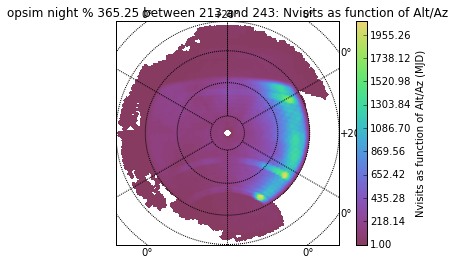

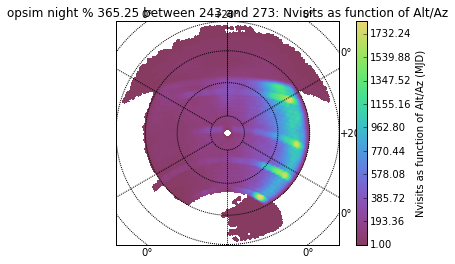

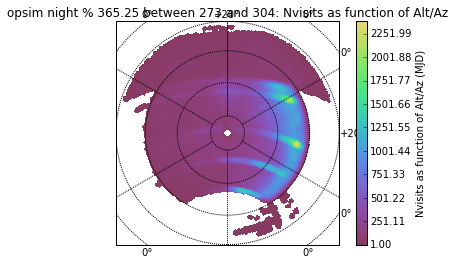

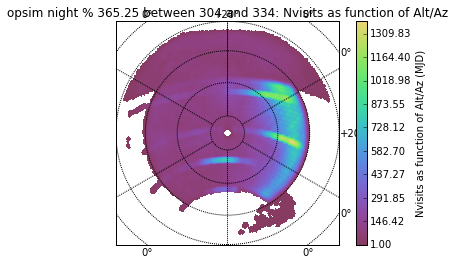

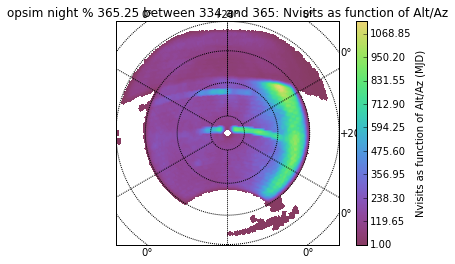

In [15]:
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
metric = metrics.CountMetric('expMJD', metricName='Nvisits as function of Alt/Az')
plotDict = {}
months = np.arange(0,365.25+365.25/12, 365.25/12)

for lowerLimit,upperLimit in zip(months[:-1],months[1:]):
    bundleList = []
    plotFuncs = [plots.LambertSkyMap()]
    sql = 'night %% 365.25 between %i and %i' % (lowerLimit,upperLimit)
    bundle = metricBundles.MetricBundle(metric, slicer,sql,
                                        plotFuncs=plotFuncs)
    bundleList.append(bundle)
    bDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

## Pointings every 2 hours of RA##

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint fieldRA between 0.000000 and 0.523599
Found 244220 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_fieldRA_between_0_000000_and_0_523599_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with fieldRA between 0.000000 and 0.523599 sqlconstraint now.
Plotting complete.
Querying database with constraint fieldRA between 0.523599 and 1.047198
Found 266400 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_fieldRA_between_0_523599_and_1_047198_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with fieldRA between 0.523599 and 1.047198 sqlconstraint now.
Plotting complete.
Querying database with constraint fieldRA between 1.047198 and 1.570796
Found 225325 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_fieldRA_between_1_047198_and_1_5707

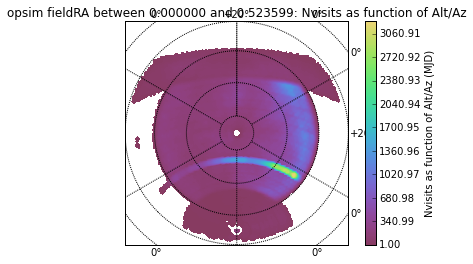

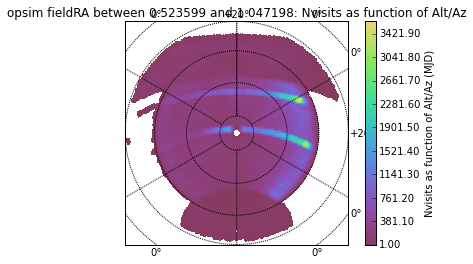

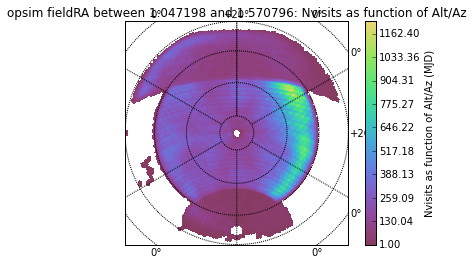

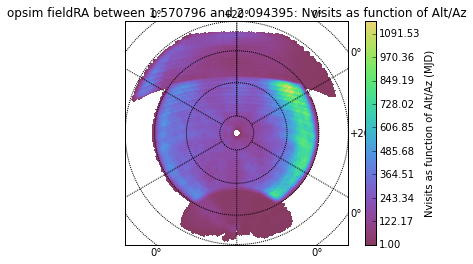

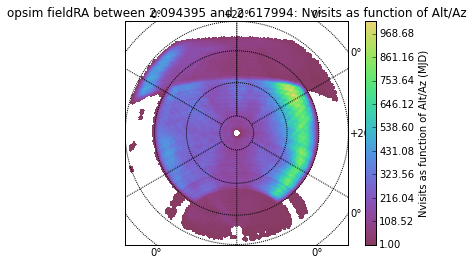

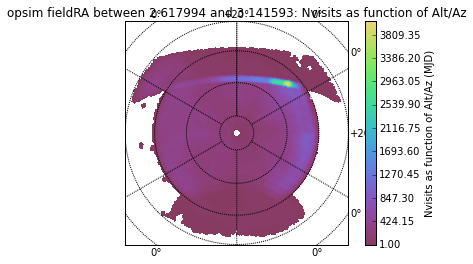

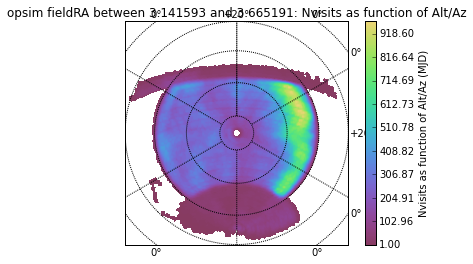

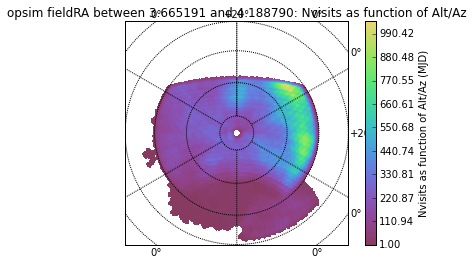

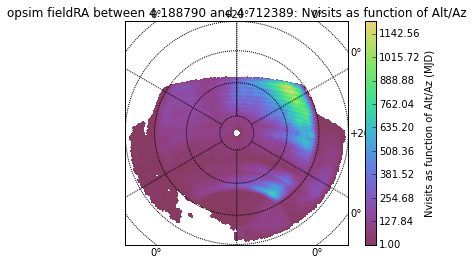

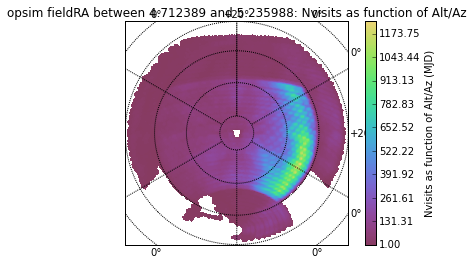

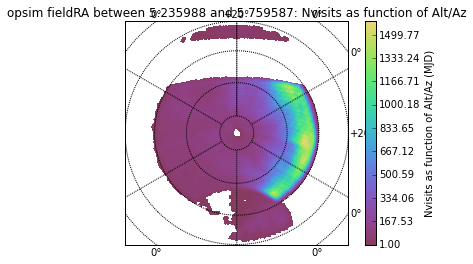

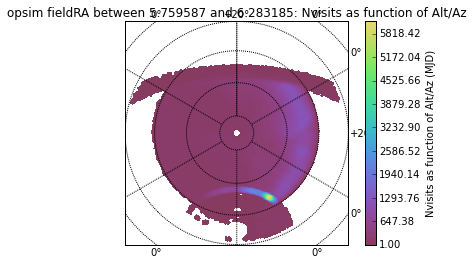

In [19]:
slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
metric = metrics.CountMetric('expMJD', metricName='Nvisits as function of Alt/Az')
plotDict = {}
ras = np.radians(np.arange(0,24+2, 2)*360./24.)
for lowerLimit,upperLimit in zip(ras[:-1],ras[1:]):
    bundleList = []
    plotFuncs = [plots.LambertSkyMap()]
    sql = 'fieldRA between %f and %f' % (lowerLimit,upperLimit)
    bundle = metricBundles.MetricBundle(metric, slicer,sql,
                                        plotFuncs=plotFuncs)
    bundleList.append(bundle)
    bDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)